# DT2119 lab2 group 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab2_proto import *
from prondict import *

In [3]:
data = np.load('lab2_data.npz',allow_pickle=True)['data']

In [4]:
data[0]

{'filename': '/home/giampi/corpora/tidigits/disc_4.2.1/tidigits/test/man/bm/oa.wav',
 'samplingrate': 20000,
 'gender': 'man',
 'speaker': 'bm',
 'digit': 'o',
 'repetition': 'a',
 'samples': array([-2, -1, -3, ..., 10,  8,  5], dtype=int16),
 'lmfcc': array([[  64.7657709 ,  -65.84854216,   96.90766069, ...,  -19.82632821,
           11.63249931,  159.50790488],
        [  57.72402791,  -79.93732698,  105.80893583, ...,  -11.84501965,
          109.29701349,  138.79176124],
        [  62.16944867, -121.81014369,   61.89899215, ...,   13.28252915,
         -127.7140298 , -128.75563442],
        ...,
        [ 190.29491187,   97.34488369,  175.61357289, ...,  -62.63035172,
          138.96640354,   82.95734165],
        [ 201.37123403,   80.09496653,   50.98133557, ...,  219.16711476,
           94.41131525, -100.10312668],
        [ 194.17067167,   70.85205455,   40.456538  , ...,   -3.81053312,
          143.83615904,  -42.56212766]])}

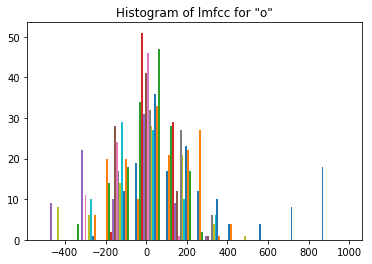

In [5]:
plt.hist(data[0]['lmfcc'])
plt.title('Histogram of lmfcc for "o"')
plt.show()

In [6]:
for i in range(len(data)):
    print(i," ",data[i]["digit"])

0   o
1   o
2   z
3   z
4   1
5   1
6   2
7   2
8   3
9   3
10   4
11   4
12   5
13   5
14   6
15   6
16   7
17   7
18   8
19   8
20   9
21   9
22   o
23   o
24   z
25   z
26   1
27   1
28   2
29   2
30   3
31   3
32   4
33   4
34   5
35   5
36   6
37   6
38   7
39   7
40   8
41   8
42   9
43   9


In [7]:
phoneHMMs = np.load('lab2_models_onespkr.npz',allow_pickle=True)['phoneHMMs'].item()
#phoneHMMs = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()

In [8]:
phoneHMMs

{'f': {'name': 'f',
  'startprob': array([1., 0., 0., 0.]),
  'transmat': array([[0.8437548, 0.1562452, 0.       , 0.       ],
         [0.       , 0.7090222, 0.2909778, 0.       ],
         [0.       , 0.       , 0.3064214, 0.6935785],
         [0.       , 0.       , 0.       , 1.       ]]),
  'means': array([[ 3.223918e+02, -2.714506e+02, -1.279559e+02,  4.936052e+01,
          -1.980236e+00, -9.977302e+00, -2.686330e+01, -4.009798e+01,
           3.357593e-01, -7.339875e+01,  2.645822e+01, -6.140060e+01,
           3.153127e+01],
         [ 4.886330e+02, -2.018883e+02, -1.998543e+02, -3.249403e+00,
          -1.454704e+01, -1.020947e+01, -5.742544e+01, -1.035629e+02,
          -2.134682e+01, -9.308153e+01,  2.632338e+01, -8.978764e+01,
           2.653858e+01],
         [ 5.815154e+02,  2.457827e+02,  2.437778e+01, -5.956849e+01,
          -1.490782e+02,  6.251358e+01, -1.867431e+01, -4.977795e+01,
           7.758113e+00,  1.062016e+02,  1.829358e+01,  2.677407e+01,
           1.66

In [9]:
len(phoneHMMs)

21

In [10]:
example = np.load('lab2_example.npz',allow_pickle=True)['example'].item()

In [11]:
example

{'filename': '/home/giampi/corpora/tidigits/disc_4.2.1/tidigits/test/woman/ew/oa.wav',
 'samplingrate': 20000,
 'gender': 'woman',
 'speaker': 'ew',
 'digit': 'o',
 'repetition': 'a',
 'samples': array([0, 1, 0, ..., 0, 0, 1], dtype=int16),
 'lmfcc': array([[-1.26806396e+01, -2.08111712e+02,  1.35146095e+01,
          5.77117953e-01,  1.05161233e+02,  9.01289871e+01,
         -3.17740266e+01, -6.77869106e+01,  6.18011949e+01,
          8.72188974e+01,  3.01387544e+02,  5.88026335e+01,
         -8.41841675e+01],
        [-1.95444538e+01, -2.22016447e+02, -7.49329771e-01,
         -5.92429424e+01,  1.94817691e+01, -4.94070622e+01,
         -6.84205611e+01,  1.10699011e+02,  1.73834611e+02,
          3.81117395e+01, -9.03818802e+00,  3.04952307e+01,
         -1.85001711e+01],
        [-1.35001547e+01, -2.01754202e+02,  8.71359481e+01,
         -2.31432414e+01, -5.44606102e+01,  1.32191693e+02,
          1.63007841e+02, -3.72796665e+01, -1.26818355e+01,
          5.83710503e+01,  1.4116722

In [12]:
list(example.keys())

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

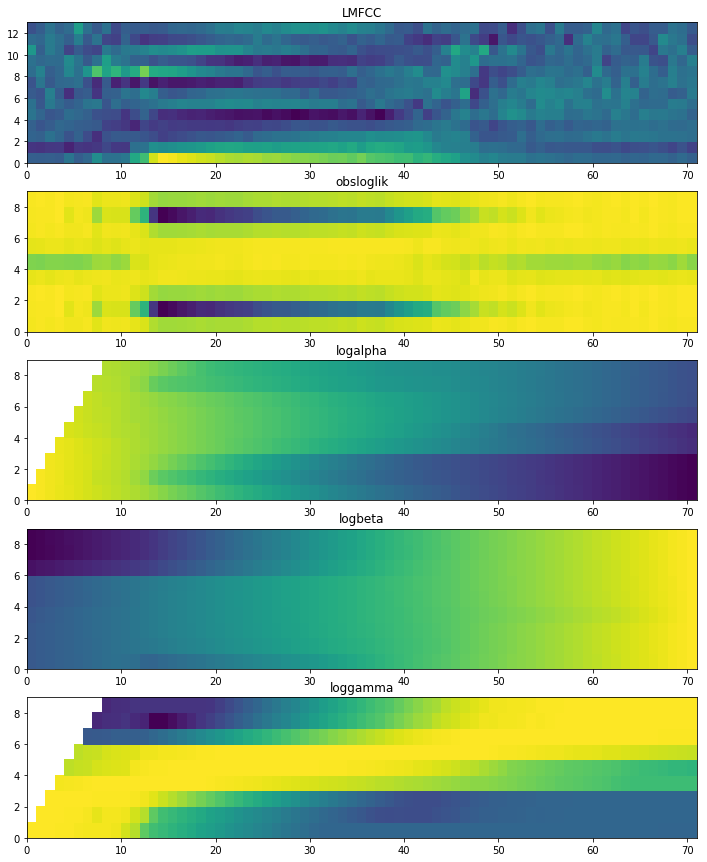

In [12]:
fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,15))
ax[0].pcolormesh(example['lmfcc'].T)
ax[0].set_title('LMFCC')

ax[1].pcolormesh(example['obsloglik'].T)
ax[1].set_title('obsloglik')

ax[2].pcolormesh(example['logalpha'].T)
ax[2].set_title('logalpha')

ax[3].pcolormesh(example['logbeta'].T)
ax[3].set_title('logbeta')

ax[4].pcolormesh(example['loggamma'].T)
ax[4].set_title('loggamma')
plt.show()

# phonetic models to wordHMMs

In [13]:
modellist = {}
wordHMMs = {}

for digit in prondict.keys():
    modellist[digit] = ['sil'] + prondict[digit] + ['sil']
    wordHMMs[digit] = concatHMMs(phoneHMMs, modellist[digit])

In [14]:
wordHMMs.keys()

dict_keys(['o', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 5.1 Gaussian emission probabilities

In [15]:
obsloglik = log_multivariate_normal_density_diag(example['lmfcc'],
                                            wordHMMs['o']['means'],
                                            wordHMMs['o']['covars'])

In [16]:
obsloglik.shape

(71, 9)

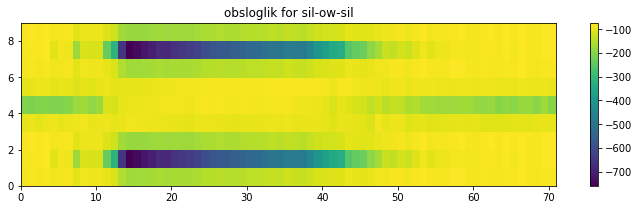

In [17]:
plt.figure(figsize=(12, 3))
plt.pcolormesh(obsloglik.T)
plt.colorbar()
plt.title('obsloglik for sil-ow-sil')  #'sil,ow,sil'
plt.show()

In [18]:
print(wordHMMs['o']['startprob'].shape)


(10,)


In [19]:
print(wordHMMs['o']['transmat'].shape)

(10, 10)


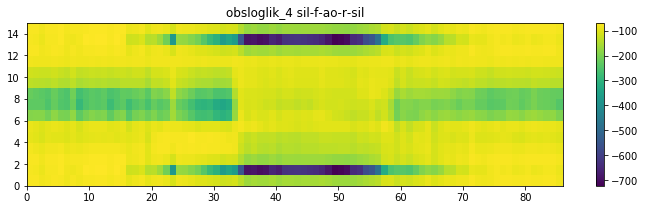

In [20]:
obsloglik_4 = log_multivariate_normal_density_diag(data[10]['lmfcc'],
                                            wordHMMs['4']['means'],
                                            wordHMMs['4']['covars'])
plt.figure(figsize=(12, 3))
plt.pcolormesh(obsloglik_4.T)
plt.colorbar()
plt.title('obsloglik_4 sil-f-ao-r-sil')   #['sil', f', 'ao', 'r', 'sil']
plt.show()

# 5.2 Forward Algorithm

In [21]:
log_sp_o = np.log(wordHMMs['o']['startprob'])
log_transmat_o = np.log(wordHMMs['o']['transmat'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [32]:
logalpha = forward(obsloglik, log_sp_o, log_transmat_o) 

In [23]:
logalpha.shape

(71, 9)

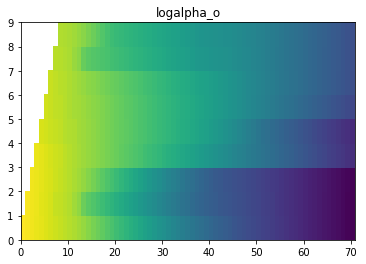

In [24]:
#plt.figure(figsize=(12, 3))
plt.pcolormesh(logalpha.T)
plt.title('logalpha_o')
#plt.colorbar()
plt.show()

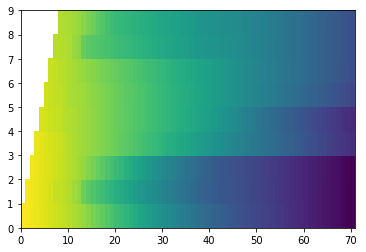

In [25]:
plt.pcolormesh(example['logalpha'].T)
plt.show()

In [28]:
logalpha - example['logalpha']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


array([[0.00000000e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan],
       [0.00000000e+00, 0.00000000e+00,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,            nan,
                   nan,            nan,            nan,            nan,
                   nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   nan,            nan,            nan,            nan,
                   nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,            nan,            nan,            nan,
                   nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan,            nan,
           

# 5.2  Scores for all utterances by forward algorithms

In [29]:
def scores(wordhmms, data):
    M = len(wordhmms) 
    N = len(data)
    scores = np.zeros((M, N))
    
    for i, HMM in enumerate(wordhmms):
        for j, utterance in enumerate(data):
            logobslik = log_multivariate_normal_density_diag(utterance['lmfcc'], 
                                                              wordhmms[HMM]['means'],
                                                              wordhmms[HMM]['covars'])
            fw = forward(logobslik, np.log(wordhmms[HMM]['startprob']),np.log(wordhmms[HMM]['transmat']))
            scores[i, j] = logsumexp(fw[-1, :])
        
    return scores

def viterbi_scores(wordhmms, data):
    M = len(wordhmms) 
    N = len(data)
    scores = np.zeros((M, N))
    
    for i, HMM in enumerate(wordhmms):
        for j, utterance in enumerate(data):
            logobslik = log_multivariate_normal_density_diag(utterance['lmfcc'], 
                                                              wordhmms[HMM]['means'],
                                                              wordhmms[HMM]['covars'])
            v, _ = viterbi(logobslik, np.log(wordhmms[HMM]['startprob']),np.log(wordhmms[HMM]['transmat']))
            scores[i, j] = v
        
    return scores

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


alpha scoring [ 0  0  1  1  4 10  4  3  4  4  5  5  4  4  7  7  4  4  4  4 10  1  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


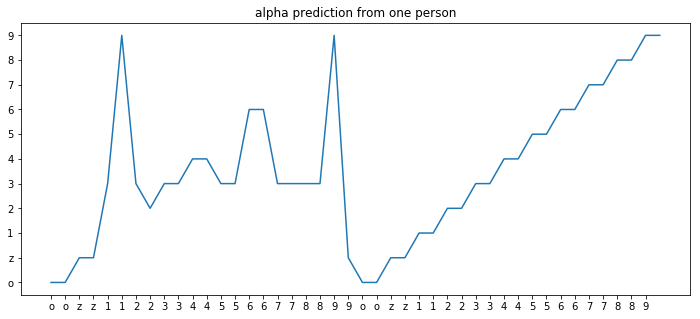

In [28]:
labels_hmm = []
labels_utterances = []
for k in wordHMMs.keys():
    labels_hmm.append(k)
    
for d in data:
    labels_utterances.append(d['digit'])

pre_scores = scores(wordHMMs, data)
plt.figure(figsize=(12, 5))
plt.title('alpha prediction from one person')
pred = np.argmax(pre_scores,axis = 0)
print('alpha scoring {}'.format(pred))
plt.plot(pred)
plt.xticks(range(0,43), labels=labels_utterances)
plt.yticks(range(0,11), labels=labels_hmm)
plt.show()

In [28]:
phoneHMMs_all = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()
modellist = {}
wordHMMs_all = {}

for digit in prondict.keys():
    modellist[digit] = ['sil'] + prondict[digit] + ['sil']
    wordHMMs_all[digit] = concatHMMs(phoneHMMs_all, modellist[digit])

In [29]:
len(phoneHMMs_all)

21

In [30]:
phoneHMMs_all

{'f': {'name': 'f',
  'startprob': array([1., 0., 0., 0.]),
  'transmat': array([[0.8074276, 0.1925724, 0.       , 0.       ],
         [0.       , 0.7835307, 0.2164693, 0.       ],
         [0.       , 0.       , 0.4751177, 0.5248824],
         [0.       , 0.       , 0.       , 1.       ]]),
  'means': array([[ 3.756838e+02, -1.892536e+02, -9.660455e+01,  4.465488e+01,
           2.823588e+01, -4.992766e-01,  4.529542e-02, -2.909808e+01,
           1.526023e+01, -3.026565e+01,  2.106727e+01, -3.956148e+01,
           2.572369e+01],
         [ 5.441120e+02, -1.801021e+02, -1.472212e+02, -1.085416e+01,
          -2.093026e+01, -1.813961e+01, -1.523612e+01, -5.690070e+01,
          -1.829125e+01, -4.970216e+01,  9.754507e+00, -5.453812e+01,
           1.968687e+01],
         [ 7.118344e+02,  2.438120e+02, -5.496016e+01,  8.645602e+00,
          -1.945088e+02,  3.470830e+01,  3.832467e+01, -7.212926e+00,
          -4.773862e+01, -2.433857e+01,  1.006693e+02, -2.232076e+01,
           7.65

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


alpha scoring [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9  2 10]


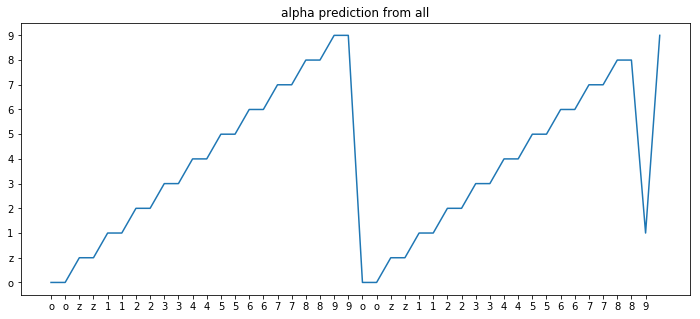

In [32]:
pre_scores_all = scores(wordHMMs_all, data)
plt.figure(figsize=(12, 5))
plt.title('alpha prediction from all')
pred_all = np.argmax(pre_scores_all,axis = 0)
print('alpha scoring {}'.format(pred_all))
plt.plot(pred_all)
plt.xticks(range(0,43), labels=labels_utterances)
plt.yticks(range(0,11), labels=labels_hmm)
plt.show()

# 5.3 Viterbi Approximation

In [33]:
v_score, path = viterbi(obsloglik, log_sp_o, log_transmat_o, forceFinalState=True)

In [34]:
v_score  #'vloglik': -5974.211288357338,

-5974.211288357338

In [35]:
'''
'vpath': array([0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8]),
'''
path

array([0., 1., 1., 1., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8.])

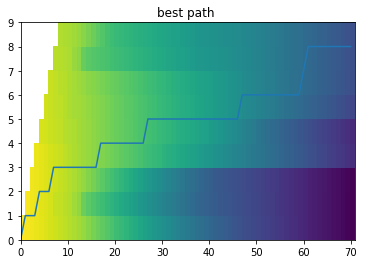

In [36]:
plt.pcolormesh(logalpha.T)
plt.title('best path ')
plt.plot(path)
plt.show()

In [37]:
v_scores_all = viterbi_scores(wordHMMs_all, data)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


viterbi scoring [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


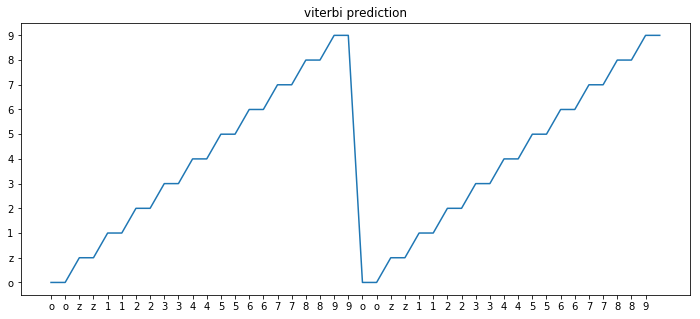

In [38]:
plt.figure(figsize=(12, 5))
plt.title('viterbi prediction')
pred_all = np.argmax(v_scores_all,axis = 0)
print('viterbi scoring {}'.format(pred_all))
plt.plot(pred_all)
plt.xticks(range(0,43), labels=labels_utterances)
plt.yticks(range(0,11), labels=labels_hmm)
plt.show()

# 5.4 Backward Algorithm

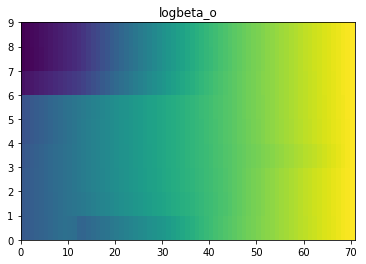

In [34]:
logbeta = backward(obsloglik, log_sp_o, log_transmat_o)
plt.pcolormesh(logbeta.T)
plt.title('logbeta_o')
plt.show()

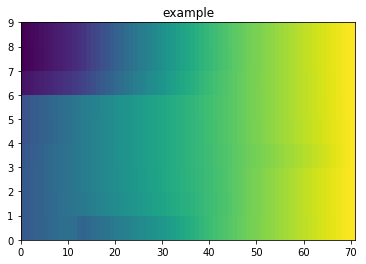

In [32]:
plt.pcolormesh(example['logbeta'].T)
plt.title('example')
plt.show()

# 6.1 State posterior probabilities

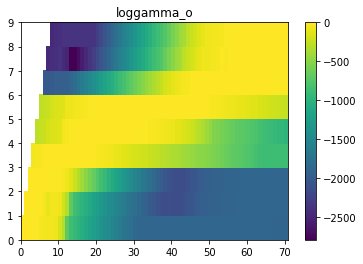

In [49]:
loggamma = statePosteriors(logalpha, logbeta)
plt.pcolormesh(loggamma.T)
plt.title('loggamma_o')
plt.colorbar()
plt.show()

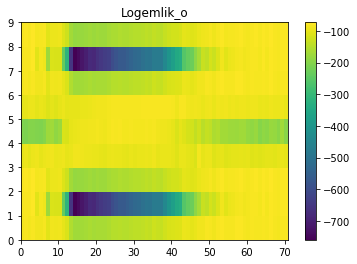

In [50]:
HMM = wordHMMs['o']
M = HMM['means'].shape[0]
log_emlik = log_multivariate_normal_density_diag(example['lmfcc'], HMM["means"], HMM["covars"])
plt.pcolormesh(log_emlik.T)
plt.colorbar()
plt.title('Logemlik_o')
plt.show()

In [ ]:
def GMM():
     log_gmm = log_alpha + log_beta - logsumexp(log_alpha[-1,:])

In [40]:
weights = np.ones(M)/M
gmmloglik(log_emlik, weights)

-6037.6766640412725

In [54]:
loggamma.shape

(71, 9)

In [55]:
np.sum(np.exp(loggamma),axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [56]:
np.sum(np.sum(np.exp(loggamma),axis=1))

70.99999999991067

# 6.2 Retraining the emission probability distributions

In [38]:
def baum_welch(data,wordHMMs):
    orig_means, orig_covars = wordHMMs['means'], wordHMMs['covars']
    converging = True
    scores = []

    for i in range(20):
        obsloglik = log_multivariate_normal_density_diag(data,wordHMMs['means'],wordHMMs['covars'])
        log_alpha = forward(obsloglik, np.log(wordHMMs['startprob']), np.log(wordHMMs['transmat'])) 
        log_beta = backward(obsloglik, np.log(wordHMMs['startprob']), np.log(wordHMMs['transmat']))
        
        scores.append(logsumexp(log_alpha[-1,:])) 
        #print(logsumexp(log_alpha[-1,:])) 
        if i >= 1 and np.abs(scores[-1]-scores[-2]) < 1.0:
            break
        log_gamma = statePosteriors(log_alpha, log_beta)
        means, covars = updateMeanAndVar(data, log_gamma)
        wordHMMs['means'] = means
        wordHMMs['covars'] = covars
        converging = False
    return scores

SCORES: 4 0N 4


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':



 SCORES: 4 0N 5


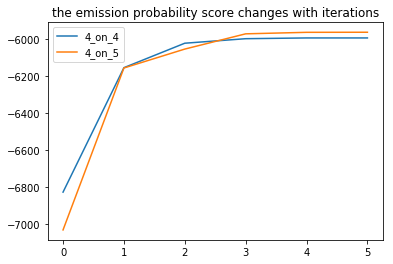

In [47]:
print("SCORES: 4 0N 4")
scores4_1 = baum_welch(data[10]['lmfcc'], wordHMMs_all['4'])
print("\n SCORES: 4 0N 5")
scores4_2 = baum_welch(data[10]['lmfcc'], wordHMMs_all['5'])
plt.plot(scores4_1, label='4_on_4')
plt.plot(scores4_2, label='4_on_5')
plt.title('the emission probability score changes with iterations')
plt.legend()
plt.show()

In [39]:
labels = []
all_scores = []
for key, hmm in wordHMMs_all.items():
    labels.append(key)
    s = baum_welch(data[10]['lmfcc'], hmm)
    all_scores.append(s)
    

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0.5, 1.0, 'the emission probability for 4 with different models')

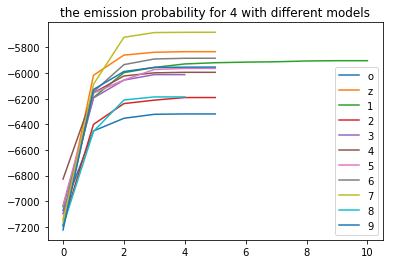

In [40]:
for a in all_scores:
    plt.plot(a)
plt.legend(labels)
plt.title('the emission probability for 4 with different models')